In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
# For unit testing answers.
from unittest.mock import patch, Mock

# Reading the data

In [3]:
df = pd.read_excel(r'C:\Users\noshi\OneDrive\Desktop\Computer Science\Computer Science 2020-2021\Data visualisation and the web\Project\Noshin Begum Data Visualisations and The Web Project\Code\Data-tables-disease-deaths.xlsx', sheet_name='Deaths')

# Show both the head and tail of the dataset.
df

,"Updated Table A2.3. Deaths attributable to the environment, by WHO region and income status, 2016§",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,World,World,Africa,Americas,NaN,Eastern Mediterranean,NaN,Europe,NaN,South-East Asia,Western Pacific,NaN
1,NaN,Total \n(all ages),\n0-4 years,All,HIC,LMIC,HIC,LMIC,HIC,LMIC,All,HIC,LMIC
2,Population,7430261888,673904396,1019920205,382020167,610136393,54017611,610317786,499400125,416914475,1947631149,213384103,1676519874
3,Total deaths,56188823,5599415,8715561,3162224,3603281,155238,3934487,4830599,4317888,13754870,1794181,11920494
4,Total environmental deaths,13668365,1573296,2534165,421463,684808,37812,945743,696167,659833,4068942,268195,3349445
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,WHO regional groupings: World Health Sta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,"see ""Country grouping"" worksheet of this...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,# Malnutrition and consequences,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,HIC: High-income countries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Reading data- specific fields

In [4]:
# Read specific columns
df = pd.read_excel(r'C:\Users\noshi\OneDrive\Desktop\Computer Science\Computer Science 2020-2021\Data visualisation and the web\Project\Noshin Begum Data Visualisations and The Web Project\Code\Data-tables-disease-deaths.xlsx', sheet_name='Deaths', index_col = 0,
                   usecols = [0, 8, 10], skiprows = [0], names = ['Disease', 'Europe', 'South-East Asia'])

# Get the specific rows on the diseases I am comparing
select_rows = df.iloc[[1, 2, 3, 7, 9, 12, 24, 31, 32, 58, 62, 63]]

select_rows

,Europe,South-East Asia
Disease,,
Population,499400125,1947631149
Total deaths,4830599,13754870
Total environmental deaths,696167,4068942
Lower respiratory infections,41849,443276
Diarrhoeal diseases,1210.79,295070
Malaria,0,21148
Tuberculosis,683.498,123686
"Trachea, bronchus, lung cancers",110544,96016
Other cancers*,144055,182387


# Clean data

In [5]:
# How many rows and columns
select_rows.shape

(12, 2)

In [6]:
# Changing data type to int
select_rows['Europe'] = select_rows['Europe'].astype(int)

In [7]:
# Changing data type to int
select_rows['South-East Asia'] = select_rows['South-East Asia'].astype(int)

In [8]:
# Checking data types
select_rows.dtypes

Europe             int32
South-East Asia    int32
dtype: object

In [9]:
# Checking for missing data
select_rows.isnull().sum()

Europe             0
South-East Asia    0
dtype: int64

In [10]:
# Checking for duplicated data
select_rows.duplicated().sum()

0

# Data Manipulations

### Statistics

In [11]:
# Statistics for disease related deaths and total population and total deaths
select_rows.describe()

,Europe,South-East Asia
count,1.200000e+01,1.200000e+01
mean,4.210651e+07,1.639267e+08
std,1.440167e+08,5.617351e+08
min,0.000000e+00,3.297000e+03
25%,2.442250e+03,1.045742e+05
50%,4.410200e+04,2.387285e+05
75%,2.820830e+05,1.349692e+06
max,4.994001e+08,1.947631e+09


In [12]:
# Statistics for disease related deaths
select_rows.iloc[3:12].describe()

,Europe,South-East Asia
count,9.000000,9.000000
mean,39030.888889,185003.000000
std,53834.262121,157929.933221
min,0.000000,3297.000000
25%,1210.000000,96016.000000
50%,3730.000000,123686.000000
75%,46356.000000,295070.000000
max,144055.000000,443276.000000


### Differences in population and deaths in South-East Asia vs Europe

In [13]:
# South-East Asia vs Europe Deaths
select_rows['SouthEastAsiaVSEuropeDeaths'] = (select_rows['Europe'].iloc[3:12] - select_rows['South-East Asia'].iloc[3:12])
select_rows

,Europe,South-East Asia,SouthEastAsiaVSEuropeDeaths
Disease,,,
Population,499400125,1947631149,NaN
Total deaths,4830599,13754870,NaN
Total environmental deaths,696167,4068942,NaN
Lower respiratory infections,41848,443276,-401428.0
Diarrhoeal diseases,1210,295070,-293860.0
Malaria,0,21148,-21148.0
Tuberculosis,683,123686,-123003.0
"Trachea, bronchus, lung cancers",110543,96016,14527.0
Other cancers*,144055,182387,-38332.0


In [14]:
# Disease related deaths information
select_rows.iloc[3:12]

,Europe,South-East Asia,SouthEastAsiaVSEuropeDeaths
Disease,,,
Lower respiratory infections,41848,443276,-401428.0
Diarrhoeal diseases,1210,295070,-293860.0
Malaria,0,21148,-21148.0
Tuberculosis,683,123686,-123003.0
"Trachea, bronchus, lung cancers",110543,96016,14527.0
Other cancers*,144055,182387,-38332.0
Stroke,46356,392720,-346364.0
Asthma,3730,107427,-103697.0
Other respiratory diseases,2853,3297,-444.0


### South-East Asia- disease related deaths as percentage of population

In [15]:
# # South-East Asia- disease related deaths percentage
select_rows['SouthEastAsiaPercent'] = (select_rows['South-East Asia'].iloc[3:12] / select_rows['South-East Asia'].iloc[0])
select_rows['SouthEastAsiaPercent'] = select_rows['SouthEastAsiaPercent'] * 100
select_rows['SouthEastAsiaPercent'].round(6)

Disease
Population                              NaN
Total deaths                            NaN
Total environmental deaths              NaN
Lower respiratory infections       0.022760
Diarrhoeal diseases                0.015150
Malaria                            0.001086
Tuberculosis                       0.006351
Trachea, bronchus, lung cancers    0.004930
Other cancers*                     0.009365
Stroke                             0.020164
Asthma                             0.005516
Other respiratory diseases         0.000169
Name: SouthEastAsiaPercent, dtype: float64

In [16]:
select_rows

,Europe,South-East Asia,SouthEastAsiaVSEuropeDeaths,SouthEastAsiaPercent
Disease,,,,
Population,499400125,1947631149,NaN,NaN
Total deaths,4830599,13754870,NaN,NaN
Total environmental deaths,696167,4068942,NaN,NaN
Lower respiratory infections,41848,443276,-401428.0,0.022760
Diarrhoeal diseases,1210,295070,-293860.0,0.015150
Malaria,0,21148,-21148.0,0.001086
Tuberculosis,683,123686,-123003.0,0.006351
"Trachea, bronchus, lung cancers",110543,96016,14527.0,0.004930
Other cancers*,144055,182387,-38332.0,0.009365


### Europe- disease related deaths as percentage of population

In [17]:
# Europe- disease related deaths percentages
select_rows['EuropePercent'] = (select_rows['Europe'].iloc[3:12] / select_rows['Europe'].iloc[0])
select_rows['EuropePercent'] = select_rows['EuropePercent'] * 100
select_rows['EuropePercent'].round(6)

Disease
Population                              NaN
Total deaths                            NaN
Total environmental deaths              NaN
Lower respiratory infections       0.008380
Diarrhoeal diseases                0.000242
Malaria                            0.000000
Tuberculosis                       0.000137
Trachea, bronchus, lung cancers    0.022135
Other cancers*                     0.028846
Stroke                             0.009282
Asthma                             0.000747
Other respiratory diseases         0.000571
Name: EuropePercent, dtype: float64

In [18]:
select_rows

,Europe,South-East Asia,SouthEastAsiaVSEuropeDeaths,SouthEastAsiaPercent,EuropePercent
Disease,,,,,
Population,499400125,1947631149,NaN,NaN,NaN
Total deaths,4830599,13754870,NaN,NaN,NaN
Total environmental deaths,696167,4068942,NaN,NaN,NaN
Lower respiratory infections,41848,443276,-401428.0,0.022760,0.008380
Diarrhoeal diseases,1210,295070,-293860.0,0.015150,0.000242
Malaria,0,21148,-21148.0,0.001086,0.000000
Tuberculosis,683,123686,-123003.0,0.006351,0.000137
"Trachea, bronchus, lung cancers",110543,96016,14527.0,0.004930,0.022135
Other cancers*,144055,182387,-38332.0,0.009365,0.028846


### Differences between South-East Asia vs Europe diseases as percentages

In [19]:
# Europe- disease related deaths percentages
select_rows['SouthEastAsiaVSEuropeDeathsPercent'] = (select_rows['SouthEastAsiaPercent'].iloc[3:12] - select_rows['EuropePercent'].iloc[3:12])
select_rows['SouthEastAsiaVSEuropeDeathsPercent'].round(6)

Disease
Population                              NaN
Total deaths                            NaN
Total environmental deaths              NaN
Lower respiratory infections       0.014380
Diarrhoeal diseases                0.014908
Malaria                            0.001086
Tuberculosis                       0.006214
Trachea, bronchus, lung cancers   -0.017205
Other cancers*                    -0.019481
Stroke                             0.010882
Asthma                             0.004769
Other respiratory diseases        -0.000402
Name: SouthEastAsiaVSEuropeDeathsPercent, dtype: float64

# Data Visualisations

### Bar Chart- Population and Total Deaths

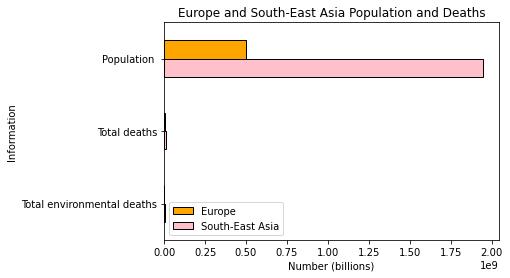

In [20]:
# Plot Europe and South-East Asia population, total deaths, total environmental deaths
sea1 = select_rows.iloc[0:3].plot.barh(y=['Europe','South-East Asia'], title='Europe and South-East Asia Population and Deaths', color=['orange', 'pink'], edgecolor='black')
sea1.set_xlabel("Number (billions)")
sea1.set_ylabel("Information")
sea1.invert_yaxis()

### Bar Chart- Total Deaths for Each Disease

Text(0, 0.5, 'Disease')

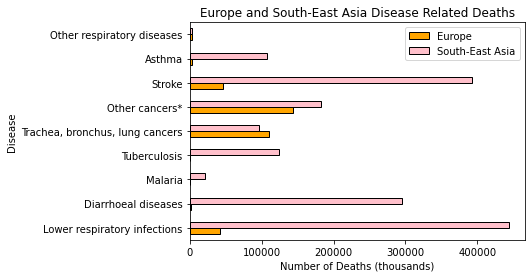

In [21]:
# Plot South-East Asia deaths under each disease
sea2 = select_rows.iloc[3:12].plot.barh(y=['Europe','South-East Asia'], title='Europe and South-East Asia Disease Related Deaths', color=['orange', 'pink'], edgecolor='black')
sea2.set_xlabel("Number of Deaths (thousands)")
sea2.set_ylabel("Disease")

### Bar Charts- Differences in Total Deaths for Each Disease

Text(0, 0.5, 'Disease')

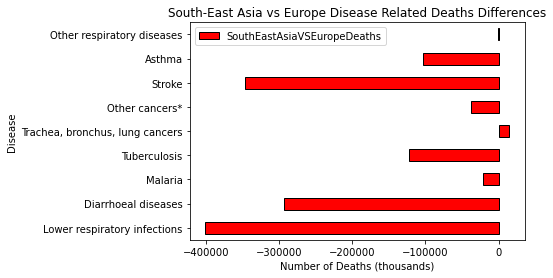

In [22]:
# Plot South-East Asia vs Europe deaths under each disease differences
dif1 = select_rows.iloc[3:12].plot.barh(y='SouthEastAsiaVSEuropeDeaths', title='South-East Asia vs Europe Disease Related Deaths Differences', color='red', edgecolor='black')
dif1.set_xlabel("Number of Deaths (thousands)")
dif1.set_ylabel("Disease")

Europe and South-East Asia Total population, Total deaths and Disease related Deaths (Pink = South-East Asia, Orange = Europe)


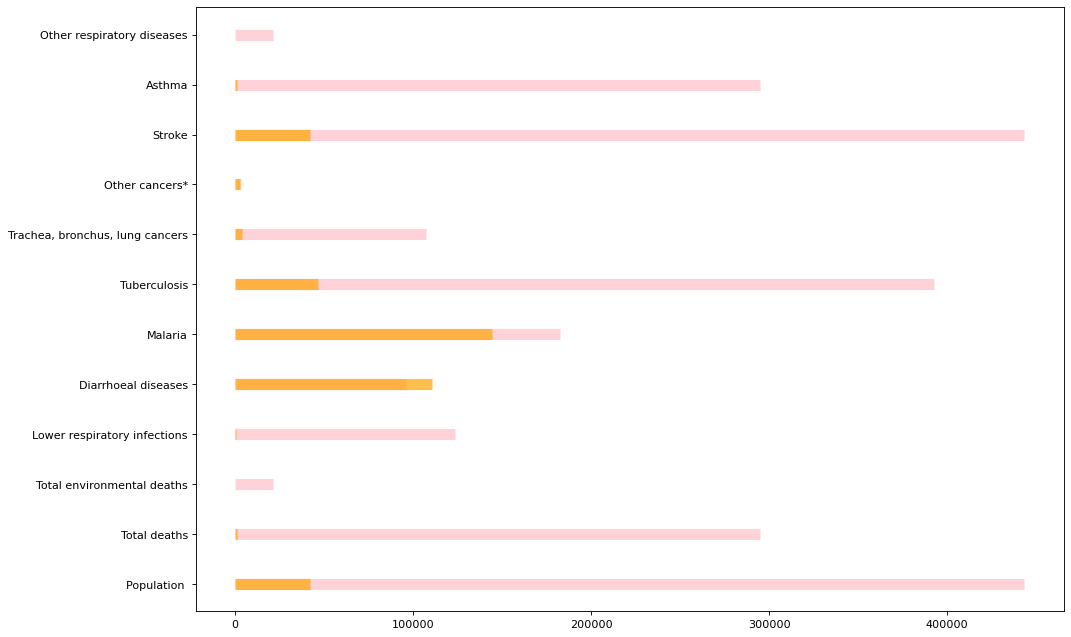

In [23]:
# Europe and South-East Asia Total population, Total deaths and Disease related deaths
plt.figure(figsize=(14,10), dpi= 80)
plt.hlines(y=select_rows.index, xmin=0, xmax=select_rows['South-East Asia'].iloc[3:12], color='pink', alpha=0.7, linewidth=10)
plt.hlines(y=select_rows.index, xmin=0, xmax=select_rows['Europe'].iloc[3:12], color='orange', alpha=0.7, linewidth=10)
print ('Europe and South-East Asia Total population, Total deaths and Disease related Deaths (Pink = South-East Asia, Orange = Europe)')

### Bar Chart- Total Deaths for Each Disease as Percentages of Population

Text(0, 0.5, 'Disease')

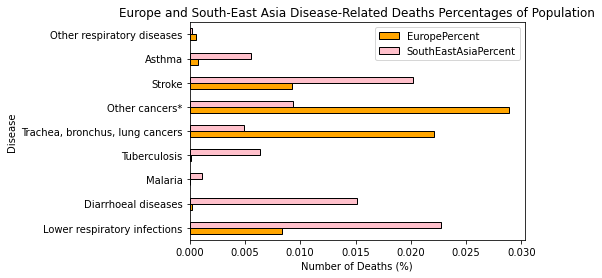

In [24]:
# Plot South-East Asia percentages deaths under each disease Percentages of Population
sea3 = select_rows.iloc[3:12].plot.barh(y=['EuropePercent', 'SouthEastAsiaPercent'], title='Europe and South-East Asia Disease-Related Deaths Percentages of Population', color=['Orange','pink'], edgecolor='black')
sea3.set_xlabel("Number of Deaths (%)")
sea3.set_ylabel("Disease")

### Bar Chart- Differences in Total Deaths for Each Disease as Percentages of Population

(array([-0.025, -0.02 , -0.015, -0.01 , -0.005,  0.   ,  0.005,  0.01 ,
         0.015,  0.02 ]),
 <a list of 10 Text major ticklabel objects>)

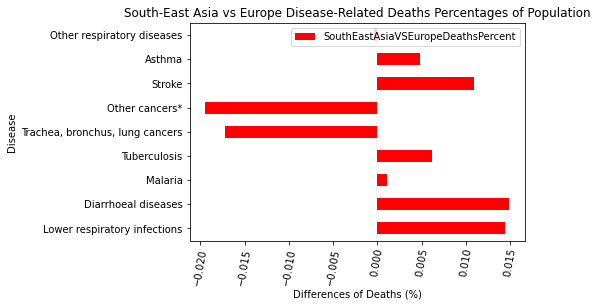

In [25]:
# Plot South-East Asia vs Europe differences in deaths as Percentages of Population
eur5 = select_rows.iloc[3:12].plot.barh(y='SouthEastAsiaVSEuropeDeathsPercent', title='South-East Asia vs Europe Disease-Related Deaths Percentages of Population', color='red')
eur5.set_xlabel("Differences of Deaths (%)")
eur5.set_ylabel("Disease")
plt.xticks(rotation=80)

### Line Graph- Total Disease Related Deaths

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 <a list of 11 Text major ticklabel objects>)

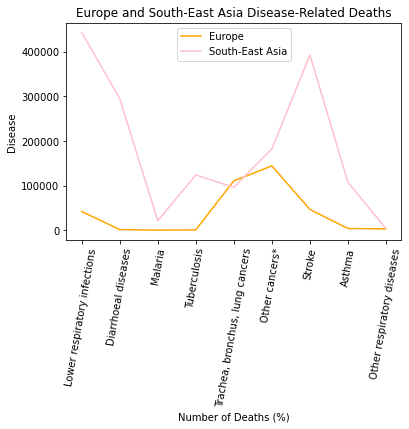

In [26]:
# Plot South-East Asia deaths under each disease
sea6 = select_rows.iloc[3:12].plot.line(y=['Europe','South-East Asia'], title='Europe and South-East Asia Disease-Related Deaths', color=['Orange','pink'])
sea6.set_xlabel("Number of Deaths (%)")
sea6.set_ylabel("Disease")
plt.xticks(rotation=80)

### Line Graph- Differences in Total Disease Related Deaths

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 <a list of 11 Text major ticklabel objects>)

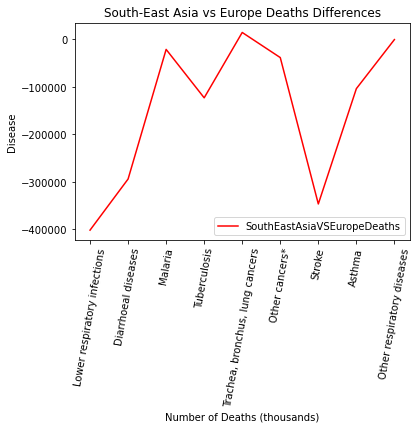

In [27]:
# Plot South-East Asia vs Europe deaths under each disease differences
dif1 = select_rows.iloc[3:12].plot.line(y='SouthEastAsiaVSEuropeDeaths', title='South-East Asia vs Europe Deaths Differences', color='red')
dif1.set_xlabel("Number of Deaths (thousands)")
dif1.set_ylabel("Disease")
plt.xticks(rotation=80)

### Line Graph- Total Deaths for Each Disease as Percentages of Population

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 <a list of 11 Text major ticklabel objects>)

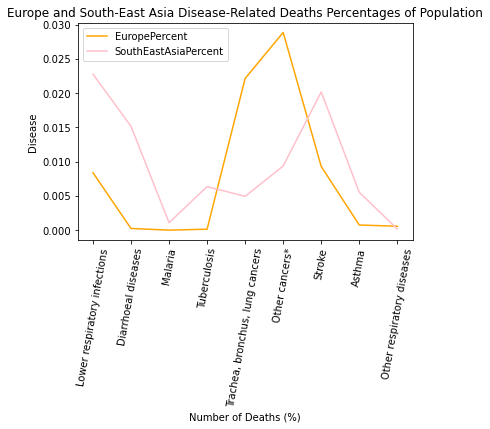

In [28]:
# Plot South-East Asia percentages deaths under each disease Percentages of Population
sea4 = select_rows.iloc[3:12].plot.line(y=['EuropePercent','SouthEastAsiaPercent'], title='Europe and South-East Asia Disease-Related Deaths Percentages of Population', color=['orange','pink'])
sea4.set_xlabel("Number of Deaths (%)")
sea4.set_ylabel("Disease")
plt.xticks(rotation=80)

### Line Graph- Differences in Total Deaths for Each Disease as Percentages of Population

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 <a list of 11 Text major ticklabel objects>)

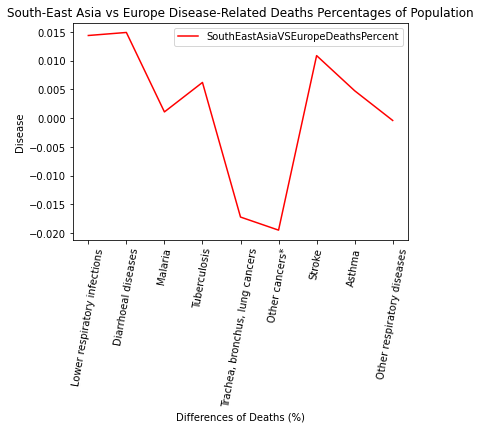

In [29]:
# Plot South-East Asia vs Europe differences in deaths as Percentages of Population
eur4 = select_rows.iloc[3:12].plot.line(y='SouthEastAsiaVSEuropeDeathsPercent', title='South-East Asia vs Europe Disease-Related Deaths Percentages of Population', color='red')
eur4.set_xlabel("Differences of Deaths (%)")
eur4.set_ylabel("Disease")
plt.xticks(rotation=80)

### Pie Charts- Total Disease Related Deaths

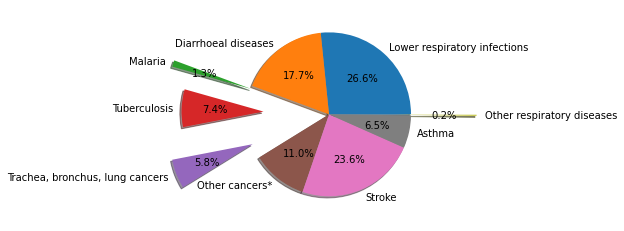

In [30]:
# South-East Asia disease related deaths
explode = (0, 0, 1, 0.8, 1, 0, 0, 0, 0.8)
plt.pie(select_rows['South-East Asia'].iloc[3:12], labels=select_rows.iloc[3:12].index, autopct='%1.1f%%', shadow=True, explode = explode)
plt.axis('equal')
plt.show()

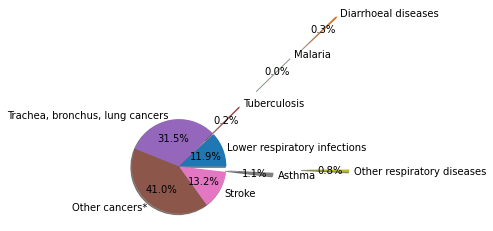

Europe Disease Related Deaths as Percentages


In [31]:
# Europe disease related deaths
explode = (0, 3.6, 2.3, 0.8, 0, 0, 0, 1, 2.6)
plt.pie(select_rows['Europe'].iloc[3:12], labels=select_rows.iloc[3:12].index, autopct='%1.1f%%', shadow=True, explode = explode)
plt.axis('equal')
plt.show()
print ('Europe Disease Related Deaths as Percentages')

### Boxplot- Disease Related Deaths

Disease Related Deaths


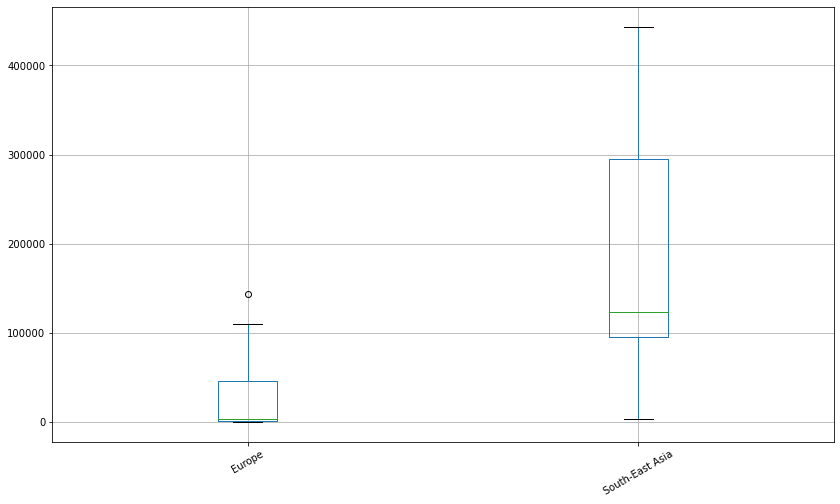

In [32]:
select_rows.iloc[3:12].boxplot(['Europe','South-East Asia'],rot = 30,figsize=(14,8))
print ('Disease Related Deaths')

### Boxplot- Disease Related Deaths Percentages of Population

Disease Related Deaths Percentages of Population


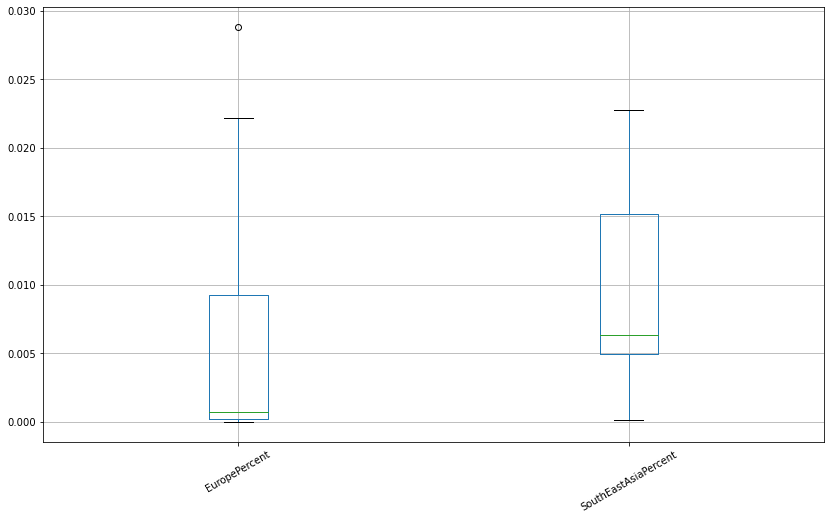

In [33]:
select_rows.iloc[3:12].boxplot(['EuropePercent','SouthEastAsiaPercent'],rot = 30,figsize=(14,8))
print ('Disease Related Deaths Percentages of Population')

### Pairwise Plot- South East Asia vs Europe Deaths Compared to the Individual Deaths

<Figure size 800x640 with 0 Axes>

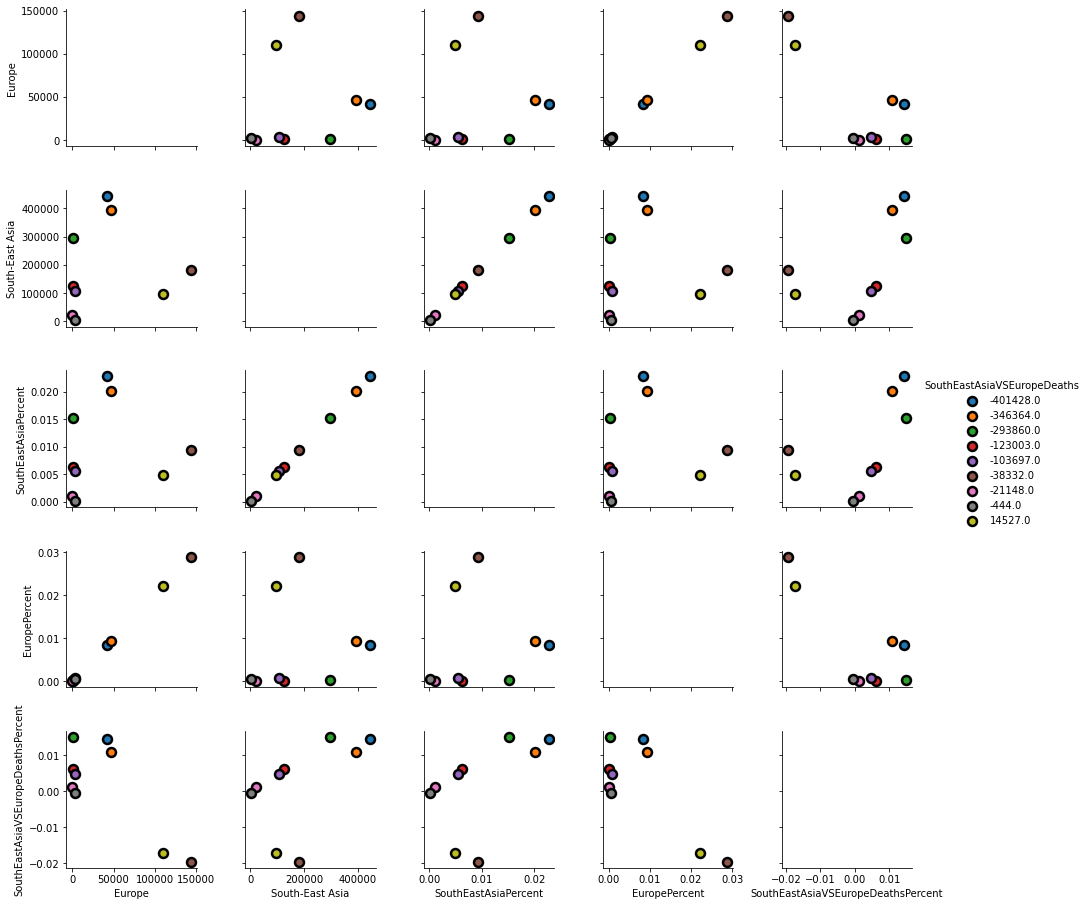

In [34]:
# Pairwise Plot- South East Asia vs Europe Deaths Compared to the Individual Deaths
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(select_rows, kind="scatter", hue= 'SouthEastAsiaVSEuropeDeaths', plot_kws=dict(s=80, edgecolor="black", linewidth=2.5))
plt.show()

### Heat Map

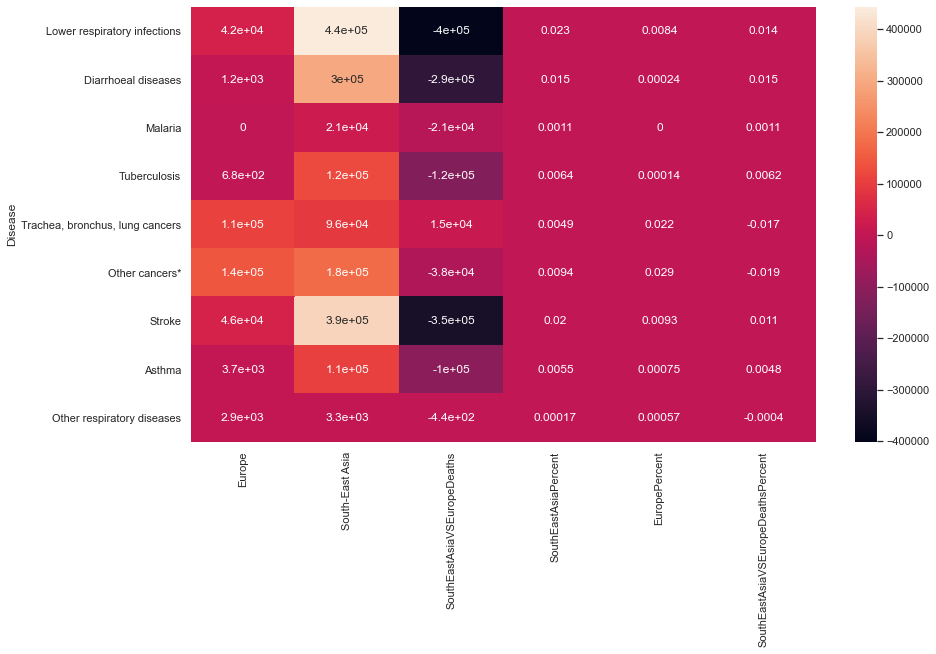

In [35]:
cor = select_rows[['Europe', 'South-East Asia']].corr()
sns.set(style='darkgrid')
plt.figure(figsize=(14,8))
sns.heatmap(select_rows.iloc[3:12], annot=True)